In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import keras

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
ibm_stock_data = pd.read_csv('../data/ibm_stock_prices.csv')

In [3]:
ibm_stock_data.shape

(14059, 7)

In [4]:
ibm_stock_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


In [5]:
ibm_stock_data.drop('OpenInt', axis=1, inplace=True)

In [6]:
ibm_stock_data.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

#### Convert data to number

In [7]:
ibm_stock_data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
ibm_stock_data['Date'] = ibm_stock_data['Date'].astype('datetime64')

In [9]:
ibm_stock_data.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676


In [10]:
ibm_stock_data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [11]:
min_date = ibm_stock_data['Date'].min()
print("min_date : ", min_date)

min_date :  1962-01-02 00:00:00


In [12]:
max_date = ibm_stock_data['Date'].max()
print("max_date : ", max_date)

max_date :  2017-11-10 00:00:00


In [13]:
def calculate_days_since_min_date(row_date):
    return row_date - min_date

In [14]:
ibm_stock_data['numeric_date'] = ibm_stock_data['Date'].apply(lambda x:calculate_days_since_min_date(x))

In [15]:
ibm_stock_data.head()

,Date,Open,High,Low,Close,Volume,numeric_date
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0 days
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,1 days
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,2 days
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,3 days
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,6 days


In [16]:
ibm_stock_data.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
numeric_date    timedelta64[ns]
dtype: object

In [17]:
ibm_stock_data['numeric_date'] = ibm_stock_data['numeric_date'].astype('timedelta64[D]')

In [18]:
ibm_stock_data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
numeric_date           float64
dtype: object

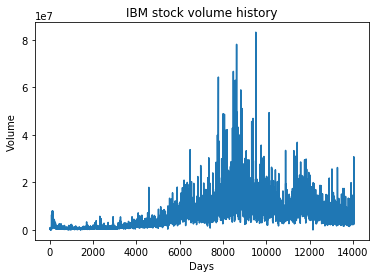

In [19]:
plt.figure()
plt.plot(ibm_stock_data["Volume"])
plt.title('IBM stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

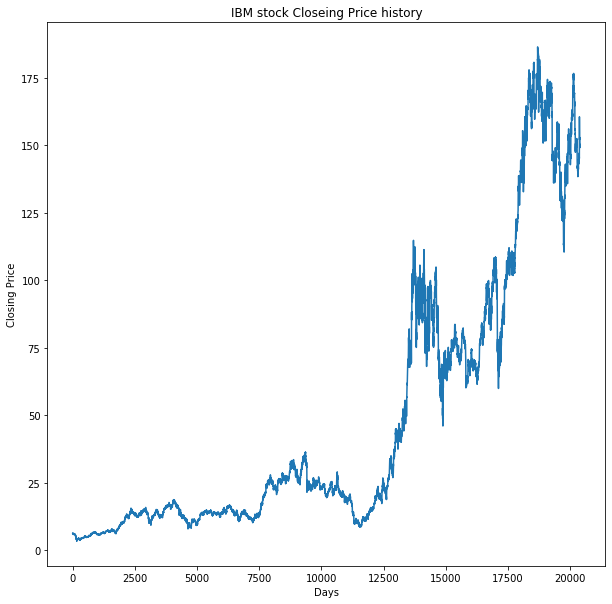

In [20]:
plt.figure(figsize=(10,10))
plt.plot(ibm_stock_data["numeric_date"], ibm_stock_data["Close"])
plt.title('IBM stock Closeing Price history')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.show()

In [21]:
ibm_stock_data.drop('Date', axis=1, inplace=True)

In [22]:
ibm_stock_data['numeric_date'].min()

0.0

In [23]:
ibm_stock_data['numeric_date'].max()

20401.0

In [24]:
stock_train_set = ibm_stock_data[ibm_stock_data.numeric_date <= 19000.0]
stock_test_set = ibm_stock_data[ibm_stock_data.numeric_date > 19000.0]

In [25]:
stock_train_set.shape

(13091, 6)

In [26]:
stock_test_set[:100]

,Open,High,Low,Close,Volume,numeric_date
13091,165.10,165.32,163.31,164.17,4588713,19001.0
13092,163.29,163.90,161.19,161.47,6603072,19004.0
13093,162.22,163.45,161.21,163.00,5269052,19005.0
13094,162.92,165.40,162.62,164.60,5508395,19006.0
13095,164.41,165.67,163.76,165.49,5445978,19007.0
13096,164.86,167.29,164.69,166.64,8749664,19008.0
13097,166.76,166.92,163.75,165.19,12665338,19012.0
13098,158.93,160.86,157.54,159.77,15739030,19013.0
13099,158.87,161.05,158.43,160.20,7955042,19014.0
13100,158.92,160.27,157.51,157.51,7913760,19015.0


In [27]:
stock_test_set.shape

(968, 6)

In [28]:
X_train_orig = stock_train_set[['Open']].values
y_train = stock_train_set['Close'].values       

In [29]:
X_test_orig = stock_test_set[['Open']].values
y_test = stock_test_set['Close'].values

In [30]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train_orig)
X_test = sc.transform(X_test_orig)

In [31]:
TIME_STEPS = 60


In [32]:
a = [0,1,2,3,4,5,6,7,8,9]
print(a[:-2])
print(a[2:])
print('(0,1:2), (1,2:3), (2,3:4), (3,4:5), (4,5:6), (5,6:7),(6,7:8), (7,8:9)')

[0, 1, 2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6, 7, 8, 9]
(0,1:2), (1,2:3), (2,3:4), (3,4:5), (4,5:6), (5,6:7),(6,7:8), (7,8:9)


In [35]:
# Each TIME_STEP is a row 'Open', 'High', 'Low', 'Volume', 'numeric_date', we are considering 4 of these to predict 5th. 
# Hence number of TIME_STEPS = 4

def build_time_series_data(x, y):

    #iters = x.shape[0]//TIME_STEPS
    
    row_dim = TIME_STEPS
    col_dim = x.shape[1]
    third_dim = x.shape[0] - TIME_STEPS
    
    x_time_series_data = np.zeros((third_dim, row_dim, col_dim))
    y_time_series_data = np.zeros((third_dim))
    num_date_corresponding_to_y = np.zeros((third_dim))
    
    for i in range(third_dim):
        x_time_series_data[i] = x[i:TIME_STEPS+i]
        y_time_series_data[i] = y[TIME_STEPS+i]
        
        
        num_date_corresponding_to_y[i] = sc.inverse_transform(x)[TIME_STEPS+i]  # as 5th columns in X is the "numeric_date"
        
    return x_time_series_data, y_time_series_data, num_date_corresponding_to_y

In [36]:
x_train_time_series_data, y_train_time_series_data, train_num_date_corresponding_to_y = build_time_series_data(X_train, y_train)
x_test_time_series_data, y_test_time_series_data, test_num_date_corresponding_to_y = build_time_series_data(X_test, y_test)

In [37]:
y_train_time_series_data.shape

(13031,)

In [38]:
y_train_time_series_data[y_train_time_series_data!=0].shape

(13031,)

In [39]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers import GRU
from keras import optimizers

from keras import regularizers

In [40]:
BATCH_SIZE = 8

t_row_dim = TIME_STEPS
t_col_dim = X_train.shape[1]
t_third_dim = X_train.shape[0] - TIME_STEPS

In [41]:
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, dropout=0.2, input_shape=(t_row_dim, t_col_dim) ))

#rnn_model.add(LSTM(50, return_sequences=True, dropout=0.2 ))

#rnn_model.add(LSTM(50, return_sequences=True, dropout=0.2 ))

rnn_model.add(LSTM(50, return_sequences=False, dropout=0.2 ))
#rnn_model.add(Flatten())
#rnn_model.add(Dense(80))
rnn_model.add(Dense(20))
rnn_model.add(Dense(1))

optimizer = optimizers.Adam(lr=0.0001)
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
rnn_model.fit(x_train_time_series_data, y_train_time_series_data,
          batch_size=BATCH_SIZE, epochs=5, shuffle=False,
          validation_data=(x_test_time_series_data, y_test_time_series_data), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 13031 samples, validate on 908 samples
Epoch 1/5
 - 151s - loss: 40.0309 - val_loss: 396.6357
Epoch 2/5


KeyboardInterrupt: 

In [ ]:
rnn_model.summary()

In [ ]:
rnn_model.save('./models/simple_RNN_stock_price_model.h5')

In [ ]:
train_predict= rnn_model.predict(x_train_time_series_data)

In [ ]:
x_train_time_series_data.shape

In [ ]:
train_num_date_corresponding_to_y.shape

In [ ]:
y_train_time_series_data

In [ ]:
y_train_time_series_data

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train_num_date_corresponding_to_y, y_train_time_series_data)
plt.scatter(train_num_date_corresponding_to_y, train_predict.ravel())
plt.title('IBM stock Closeing Price history')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.show()

https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/